In [12]:
# Ignorar os avisos
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Visualização e manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Configurações
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)


# Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Pré-processamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer  # Importe SimpleImputer do módulo sklearn.impute


# Métricas de avaliação
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error  #para regressão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  #para classificação


In [19]:
df=pd.read_csv('analise_vinho_tinto.csv')

In [20]:
df = df.iloc[:, 1:]

In [21]:
df.shape

(1599, 12)

In [22]:
df.columns 

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloreto                1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloreto                  0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

<Axes: >

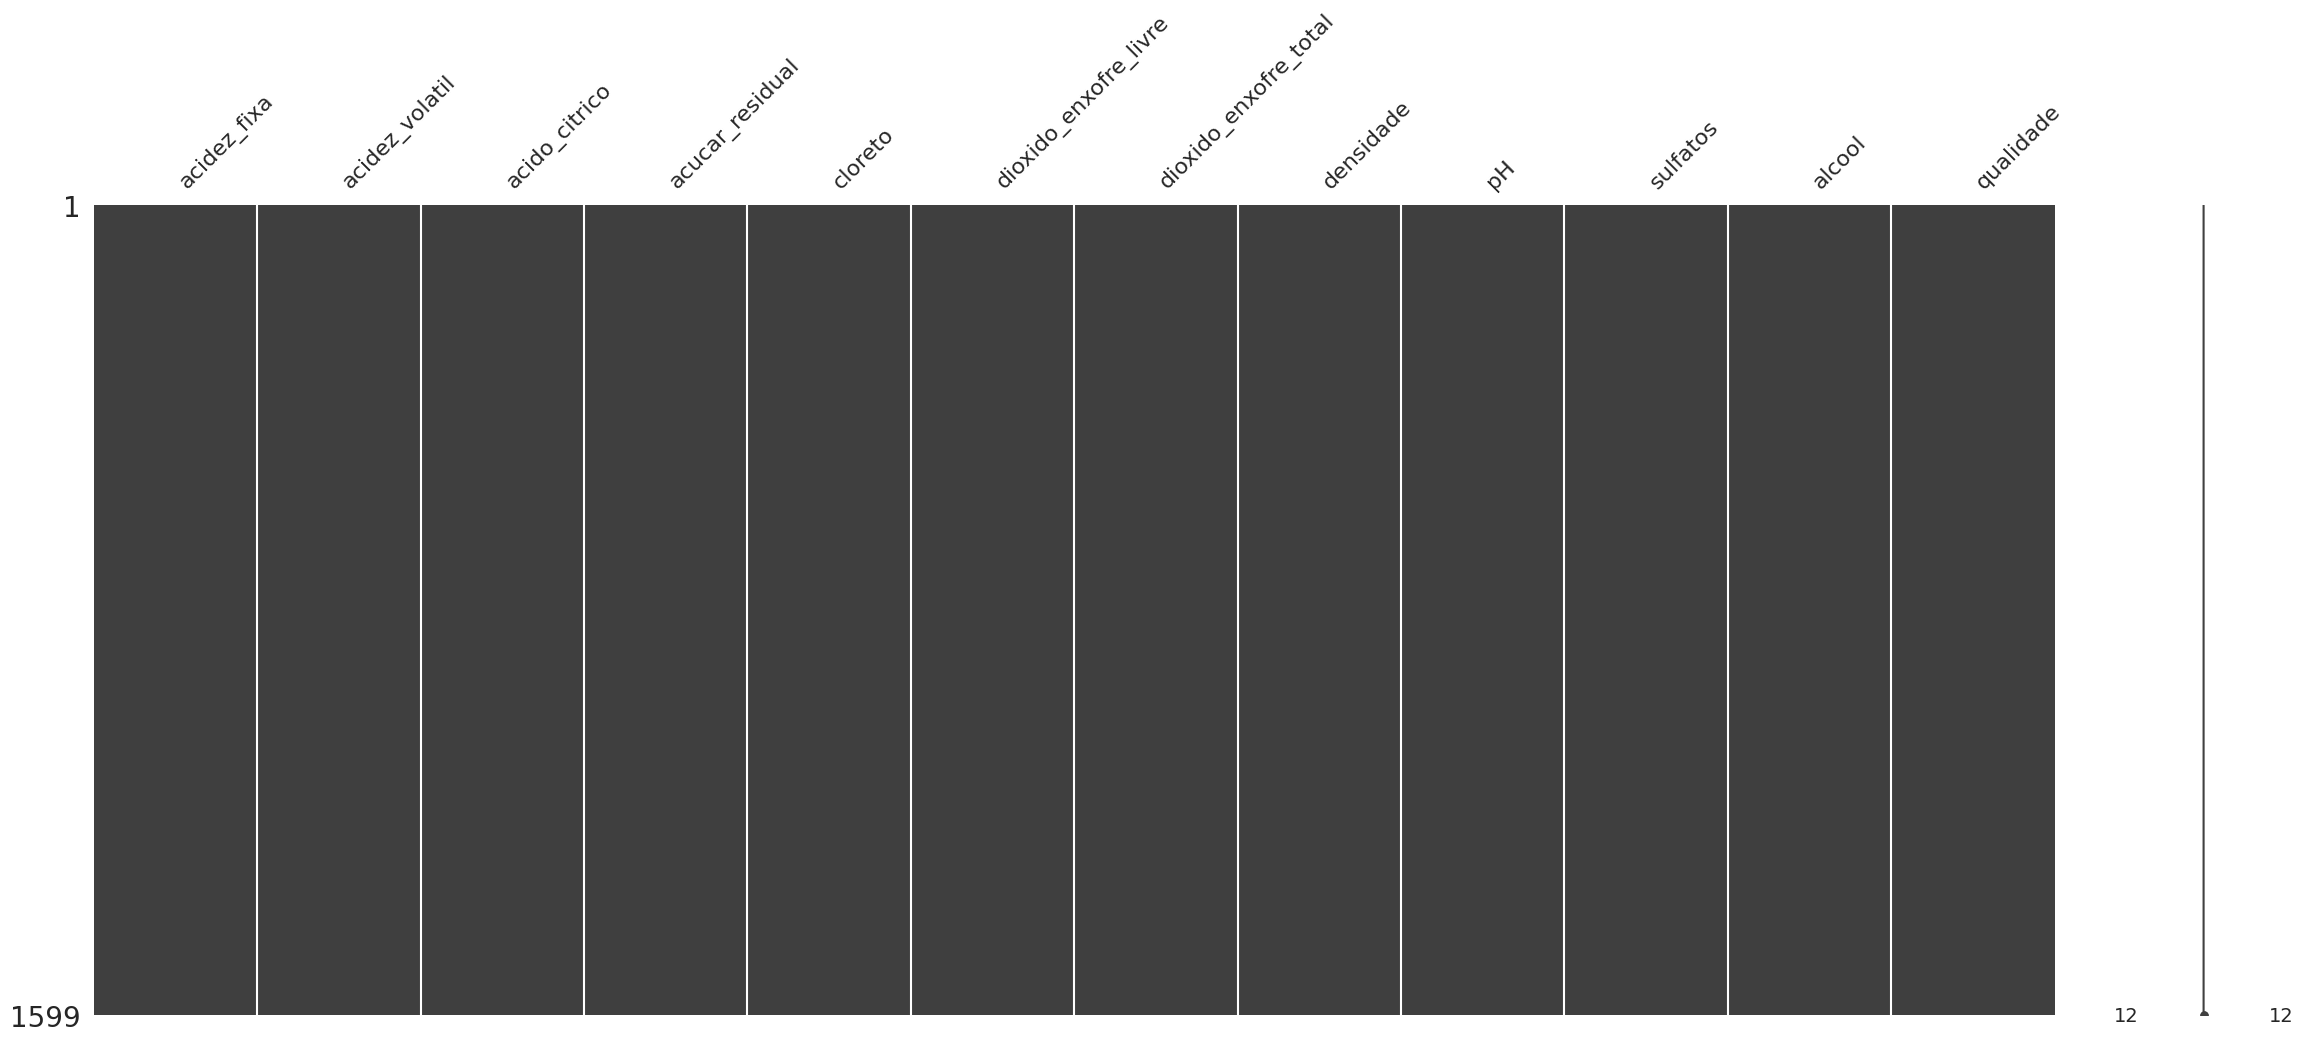

In [25]:
msno.matrix(df)

# Análise univariada

In [26]:
df.describe(include='all')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Os historiogramas são úteis para entender a distribuição de dados, identificar tendências, padrões e outliers em um conjunto de dados. 

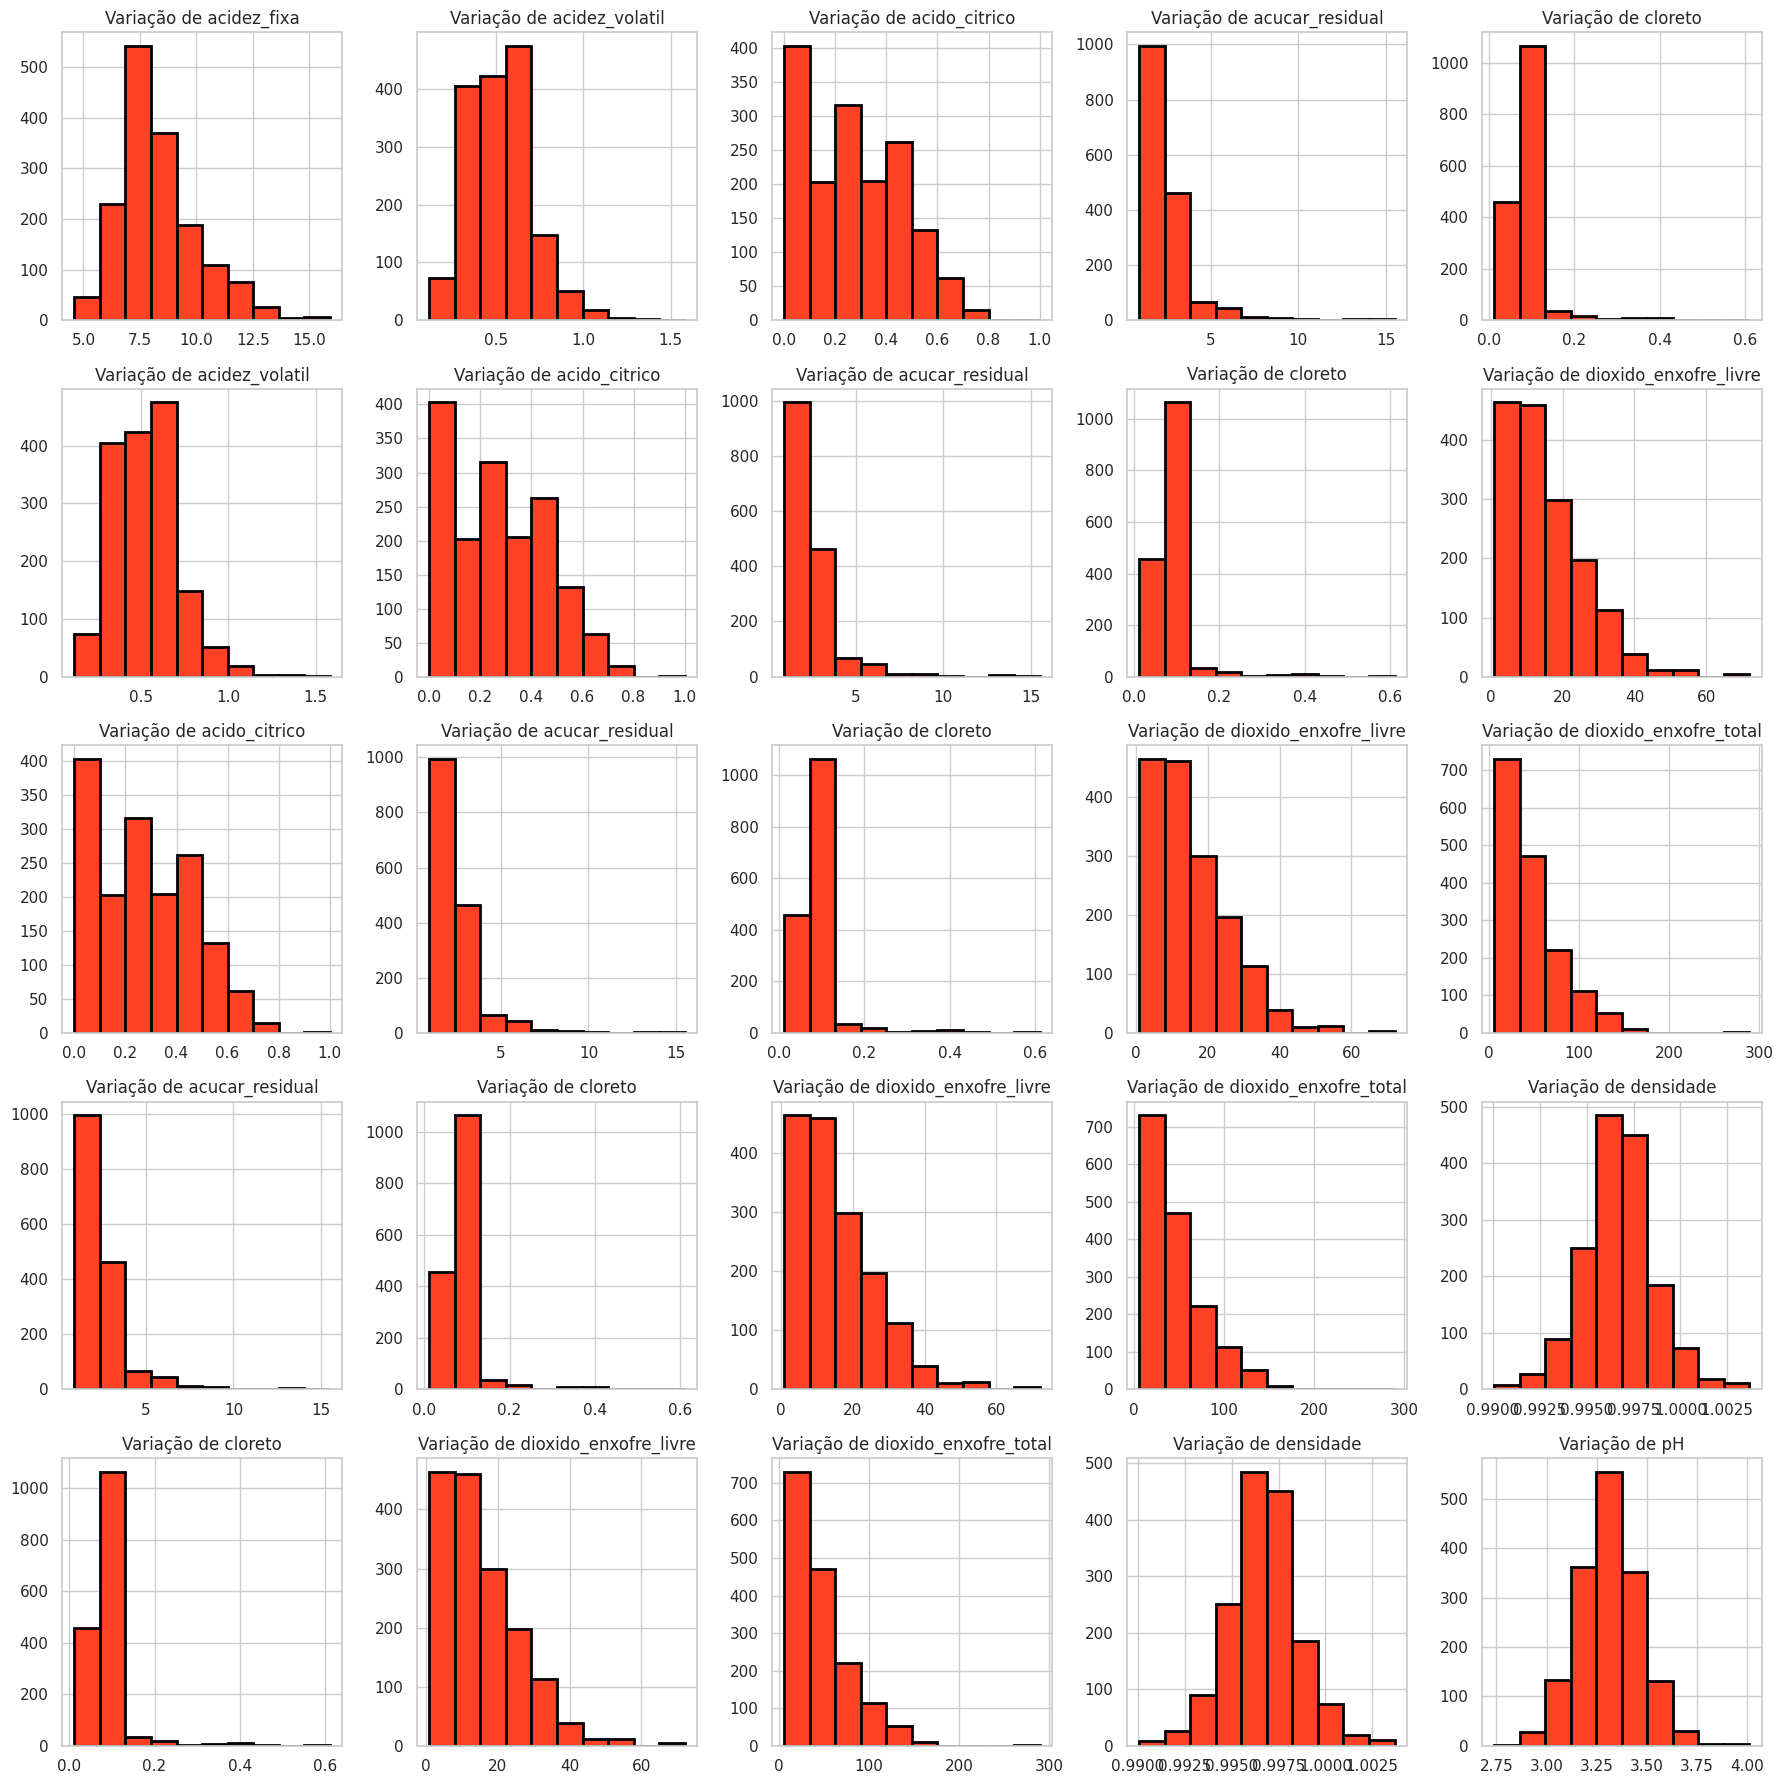

In [33]:
fig, axes = plt.subplots(5, 5)
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
           'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
for i in range(5):
    for j in range(5):
        axes[i, j].hist(x=colunas[i + j], data=df,
                        edgecolor='#000000', linewidth=2, color='#ff4125')
        axes[i, j].set_title('Variação de ' + colunas[i + j])
fig = plt.gcf()
fig.set_size_inches(18, 18)
fig.tight_layout()


### Correlação entre diferentes características usando um mapa de correlação

<Axes: >

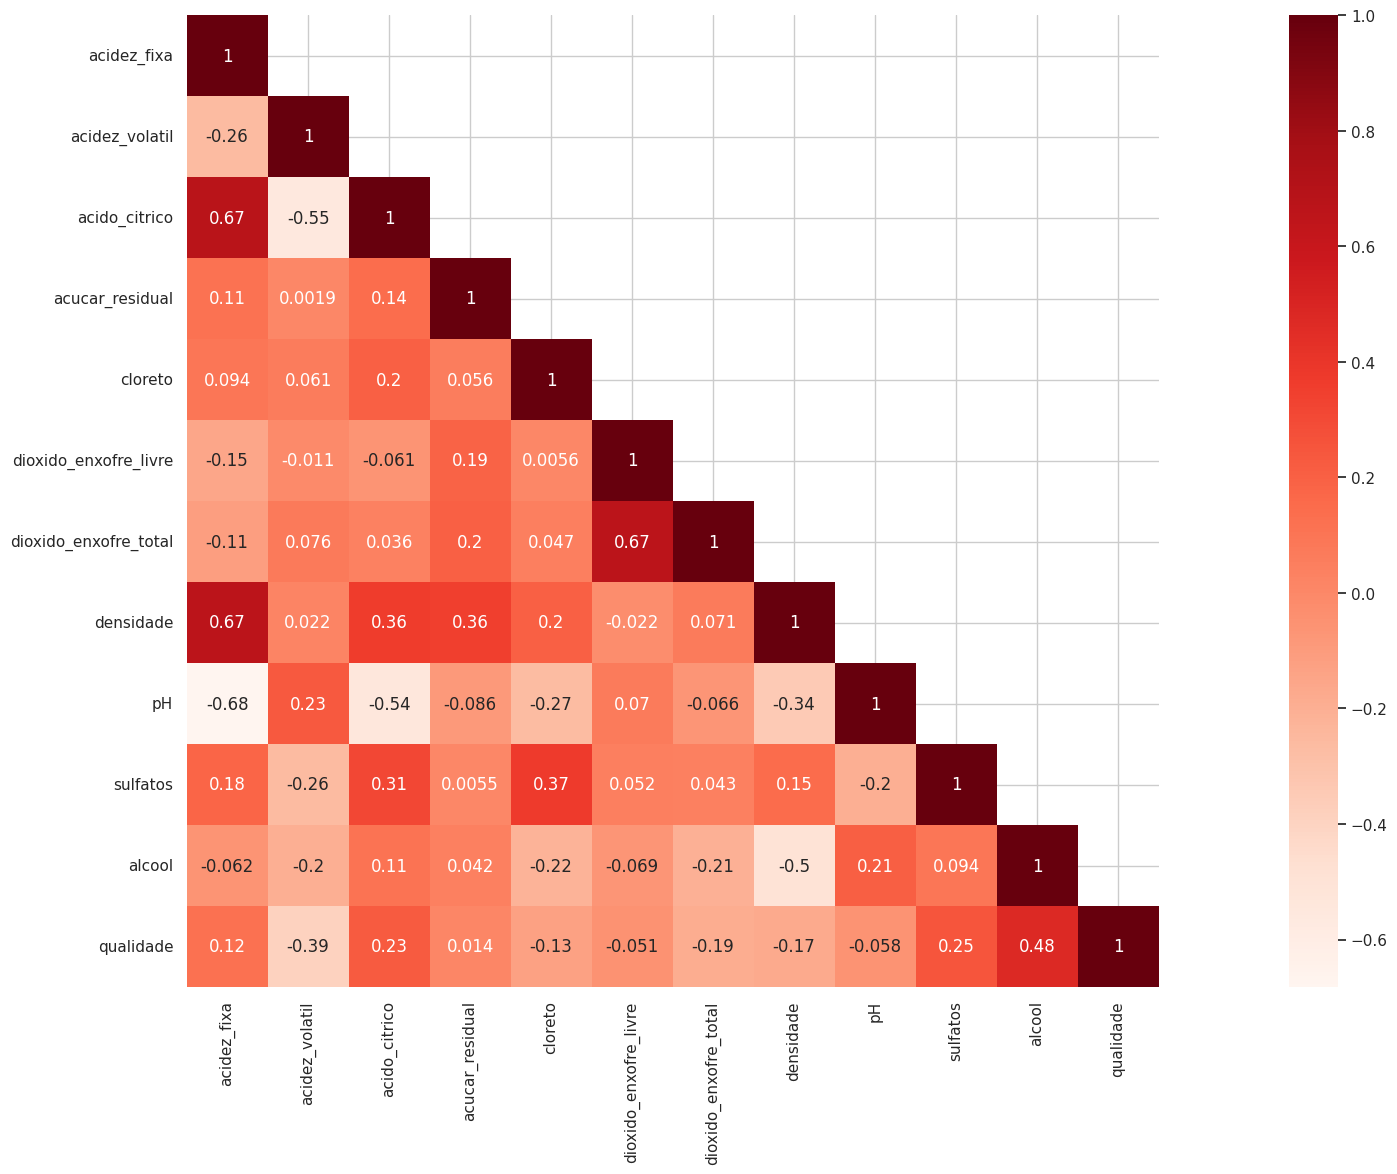

In [37]:
matriz_correlacao = df.corr()
mascara = np.array(matriz_correlacao)
mascara[np.tril_indices_from(mascara)] = False
figura = plt.gcf()
figura.set_size_inches(30, 12)

# Usar a paleta de cores "Reds" para criar um degradê de tons de vermelho
sns.heatmap(data=matriz_correlacao, mask=mascara, square=True, annot=True, cbar=True, cmap="Reds")


**INFERÊNCIAS DO MAPA DE CALOR ACIMA:**

1. A qualidade do vinho está altamente relacionada à acidez volátil.

2. Além disso, a qualidade do vinho está altamente correlacionada com o teor alcoólico.

3. O pH e o ácido cítrico/ acidez fixa estão altamente inversamente relacionados, pois todos sabemos que os ácidos têm valores de pH menores.

4. A relação consigo mesma (ou seja, de uma característica consigo mesma) é igual a 1, como esperado.

5. Outras inferências semelhantes podem ser feitas.

### Agora é possível visualizar a variação da qualidade em relação a distintos atributos numéricos.

#### A função cria e exibe três gráficos em uma única chamada, usando os parâmetros fornecidos. É útil quando desejar visualizar diferentes aspectos da relação entre duas variáveis em um conjunto de dados.

In [38]:
def plot(feature_x, target='qualidade'):
    sns.catplot(x=target, y=feature_x, data=df, kind='bar', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='violin', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='swarm', height=5, aspect=1)

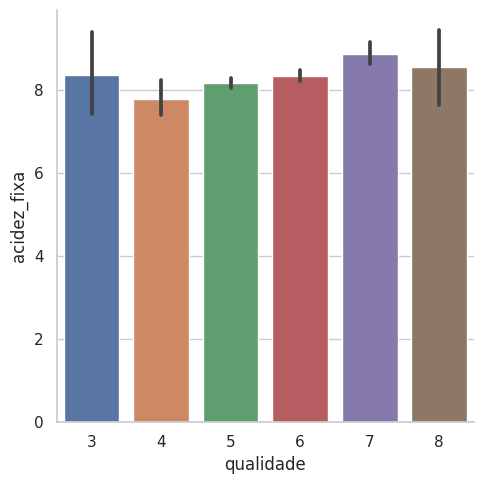

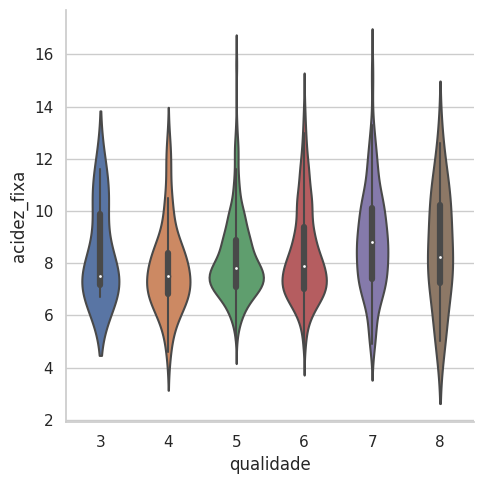

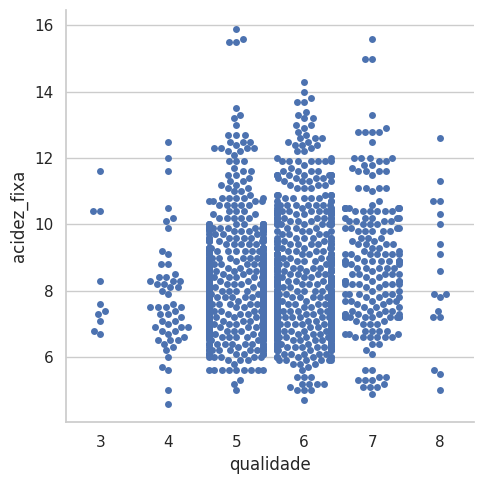

In [40]:
plot('acidez_fixa','qualidade')

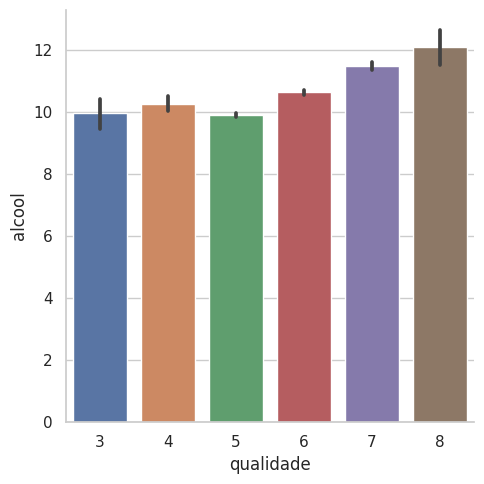

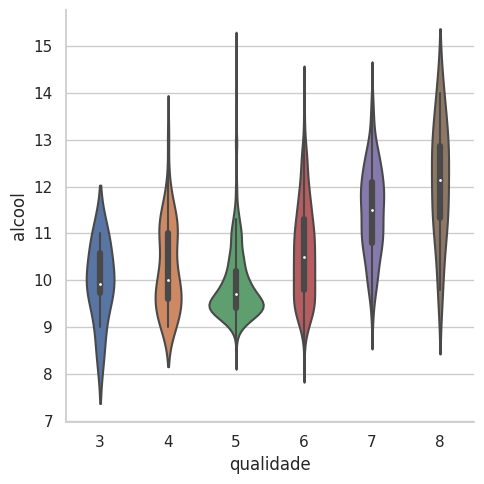

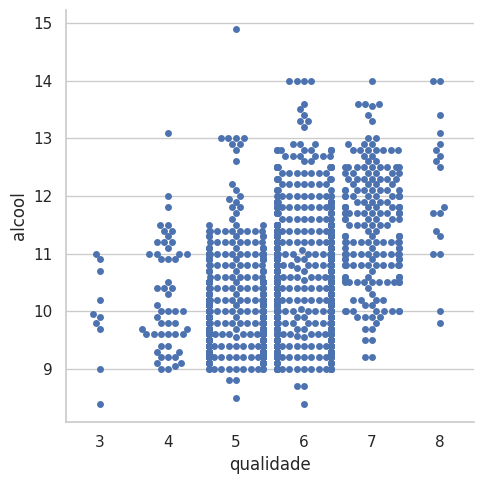

In [41]:
plot('alcool','qualidade')

## Preparação Concluída: Avançando para a Modelagem de Dados

In [42]:
intervalos = (2, 6.5, 8)
nomes_grupos = ['ruim', 'bom']
df['qualidade'] = pd.cut(df['qualidade'], bins=intervalos, labels=nomes_grupos)


In [43]:
# Cria uma instância do LabelEncoder
codificador_rotulos = LabelEncoder()